## This code implements a linear model, included both analytical and numerical methods

In [1]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
# Generate data
N = 10**6 # number of samples
x = np.random.rand(N,1)
# Add random noise
y =  4.54 + 3.15*x + np.random.randn(N,1)

In [3]:
# Add column ones 
ones = np.ones((x.shape[0],1))
Xhat = np.concatenate((ones, x), axis = 1)

In [4]:
# Creat decorator to measure runtime
def time_measure(fn):
    def get_time(*args, **kwargs):
        start = time.time()
        output = fn(*args, **kwargs)
        print(f"Runtime in function {fn.__name__} is {time.time() - start} secs.")
        return output # make sure that the decorator returns the output of fn
    return get_time

## Method 1. Analytical Method

In [5]:
# Calculate by using closed-form
@time_measure
def closed_form(X, y):
    A = np.dot(X.T, X) # Size of A just depends on No. of features. 
    b = np.dot(X.T, y)
    w = np.dot(np.linalg.pinv(A), b)
    return w

In [6]:
w = closed_form(Xhat,y)
# Calculate MSE
def mse_lr(w):
    err = np.dot(Xhat, w) - y
    return (1/N)*np.linalg.norm(err)**2

err1 = mse_lr(w)
print (f"MSE error of closed-form method is {err1}")
w

Runtime in function closed_form is 0.031914710998535156 secs.
MSE error of closed-form method is 1.0006576113958614


array([[4.54302783],
       [3.14564612]])

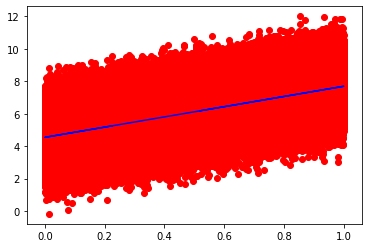

In [7]:
# Plot
plt.scatter(x, y, color = 'red')
plt.plot(x, np.dot(Xhat, w), color = 'blue')

## Method 2. Numerical Method

In [8]:
# Calculate by applying Gradient Decent 
def grad_mse(w):
    err = np.dot(Xhat, w) - y
    return (2/N)*np.dot(Xhat.T, err)


def mse_lr(w):
    err = np.dot(Xhat, w) - y
    return (1/N)*np.linalg.norm(err)**2

@time_measure
def GD(w, alpha, eta):
    """
    alpha: step size
    eta: stop condition
    """
    for i in range(10000):
        w_new = w - alpha*grad_mse(w)
        if np.linalg.norm(grad_mse(w)) < eta:
            break
        w = w_new
    print (f"MSE error of {GD.__name__} method is {mse_lr(w_new)} after {i} iterations")
    return w_new

In [9]:
w2 = np.array([[25083], [9687]]) # Initial guess
alpha = 0.1
eta = 1e-3
w_new = GD(w2, alpha, eta)
w_new

MSE error of get_time method is 1.000661226945883 after 981 iterations
Runtime in function GD is 19.21560049057007 secs.


array([[4.54652708],
       [3.13911051]])

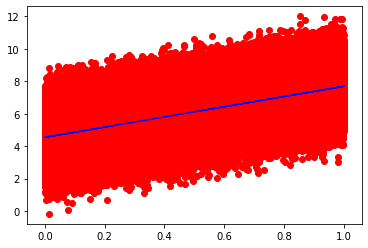

In [10]:
# Plot
plt.scatter(x, y, color = 'red')
plt.plot(x, np.dot(Xhat, w_new), color = 'blue')

## Conclusion:
1. Numerical method: need to trade-off between runtime and stepsize.
2. Analytical method runtime just depends on number of features.
3. Analytical method does not always run slower than numerical method when increasing the sample size (especially when the number of features is small). 

## Stochastic gradient

In [13]:
def sgrad_mse(w, i, x_idx):
    idx = x_idx[i]
    err = np.dot(Xhat[idx,:],w) - y[idx]
    out = err*Xhat[idx,:]
    return out.reshape(2,1)


# def mse(w, i, x_idx):
#     idx = x_idx[i]
#     err = np.dot(Xhat[idx,:],w) - y[idx]
#     return err**2

count = 0
checkpoit = 10
@time_measure
def SGD(w_int, alpha, epsilon):
    """
    alpha: step size
    epsilon: stop condition
    """
    w = [w_int]
    w_last_check = w_int
    count = 0
    checkpoint = 10 # check every 10 iterations
    for it in range(10): # number of epoches
        x_idx = np.random.permutation(N)
        for i in range(N): # loop all the data
            count += 1
            w_new = w[-1] - alpha*sgrad_mse(w[-1],i,x_idx)
            w.append(w_new)
            if count%checkpoint == 0:
                w_current_check = w_new
                if np.linalg.norm(w_current_check - w_last_check)/len(w_int) < epsilon:
                    return w
                w_last_check = w_current_check
    print (f"MSE error of {SGD.__name__} method is {mse_lr(w_new)} after {count} iterations")
    return w

In [14]:
w_new2 = SGD(w2, alpha, eta)
w_new2[-1]

Runtime in function SGD is 0.27825427055358887 secs.


array([[4.39946637],
       [2.79153697]])